In [2]:
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

sb.set_style('whitegrid')

In [3]:
%matplotlib inline

## Part 1: Quick Linear Algebra

###Exercise 1.1

In [4]:
npv1 = np.array([1,4,7])
npv2 = np.array([3,2,78])

l1 = [1,4,7]
l2 = [3,2,78]

#Adding vectors
npv1+npv2 

array([ 4,  6, 85])

In [5]:
#Adding lists
l1+l2 

[1, 4, 7, 3, 2, 78]

In [6]:
# Multiplying vectors (scalar)
npv1*8

array([ 8, 32, 56])

In [7]:
# Multiplying lists (scalar)
l1*8

[1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7]

In [8]:
# Multiplying vectors
npv1*npv2 # Notice this is element by element multiplication!!

array([  3,   8, 546])

In [9]:
# Multiplying vectors 2
npv1.dot(npv2) # This is inner multiplication

557

In [11]:
# Multiplying lists
l1*l2

TypeError: can't multiply sequence by non-int of type 'list'

###Exercise 1.2

In [39]:
Queue = ['Ned','Catelyn','Robb','Sansa','Ayra','Bran','Rickon']

Queue.append('Jon')
Queue.insert(3,'Theon')
for i in range(3):
    Queue.pop(0)
Queue[0]='Reek'
print Queue

['Reek', 'Sansa', 'Ayra', 'Bran', 'Rickon', 'Jon']


###Exercise 1.3

In [63]:
from data_grab import Import_data
y, x1, x2, x3, x4 = Import_data()
x0 = np.ones(len(x1))

In [64]:
Xm = np.array([x0,x1,x2,x3,x4]).T
XX=Xm.T.dot(Xm)
XX1 = np.linalg.inv(XX)
betas = XX1.dot(Xm.T.dot(y))
for i in range(len(betas)):
    print "beta",i,":",betas[i]

beta 0 : 389.481541602
beta 1 : 0.0240013506812
beta 2 : -2.11807695639
beta 3 : -6.13464450615
beta 4 : 97.4425763742


## Part 2: Lake Model
###Exercise 2.1

In [110]:
# Step 1: set paramenters
alpha = 0.01
lamb = 0.25
b = 0.01
d = 0.005

# Step 2: build the Ahat matrix
A = np.array([ [(1-d)*(1-alpha), (1-d)*lamb],
                [(1-d)*alpha + b, (1-lamb)*(1-d) + b ]])
Ahat = A/(1+b-d) # Matrix transformation to rate version

# Step 3: find the eigenvector corresponding to the unit eigenvalue
eigvals, eigvecs = np.linalg.eig(Ahat)
print "eigenvalues: ",eigvals 
print "eigenvectors: ",eigvecs

eigenvalues:  [ 1.          0.73263682]
eigenvectors:  [[ 0.99679933 -0.70710678]
 [ 0.07994431  0.70710678]]


It is the first column! But it is *normlized* so the length of the vector is 1.

Call $\bar{x} = (z,y)$ our objective, so $z = \bar{e}$, $y = \bar{u}$ and $(a,b)$ our eigenvector column:

$$ a = \frac{z}{norm(\bar{x})} $$
$$ b = \frac{y}{norm(\bar{x})} $$

We could find $z$ and $y$ just with this, knowing that the norm is $\sqrt{(z^2+y^2)}$, but there is a faster way, remembering that $\bar{e}+\bar{u}=1$ so $y = 1-z$.

In less than 2 minutes with pen and paper you can see that $norm(\bar{x}) = \frac{1}{(a+b)}$. The rest is easy:

In [111]:
# Step 3: Find the norm of our objective vector
norm = 1/(eigvecs[0][0]+eigvecs[1][0])

solution = np.array((eigvecs[0][0]*norm,eigvecs[1][0]*norm))
print "Steady-State employment: ",solution[0]
print "Steady-State unemployment: ",solution[1]

Steady-State employment:  0.925753628582
Steady-State unemployment:  0.0742463714179


###Exercise 2.2 and 2.3

In [112]:
# Step 1: set paramenters
alpha = 0.02
lamb = 0.20
b = 0.01
d = 0.005

# Step 2: set vectors and matrices
x_t = np.array([0,1]) # All workers start unemployed
A = np.array([ [(1-d)*(1-alpha), (1-d)*lamb],
                [(1-d)*alpha + b, (1-lamb)*(1-d) + b ]])
Ahat = A/(1+b-d) # Matrix transformation to rate version
x_t1 = Ahat.dot(x_t) # First step

# Step 3: 
eps = 1e-10 # set a "close enough to 0" (remember computer are annoyingly precise)
timer = 1 # set a timer to count the number of iterations we need
u_path = [x_t[1],x_t1[1]] # Generate a list for the path of unemployment, starting from the first values
e_path = [x_t[0],x_t1[0]] # Generate a list for the path of employment

while np.abs(x_t1-x_t).max() > eps:
    timer +=1
    x_t = x_t1
    x_t1 = Ahat.dot(x_t)
    u_path.append(x_t1[1])
    e_path.append(x_t1[0])
    
print "Steady-State employment: ",x_t1[0]
print "Steady-State unemployment: ",x_t1[1]
print "Number of iterations: ",timer

Steady-State employment:  0.869375272721
Steady-State unemployment:  0.130624727279
Number of iterations:  84


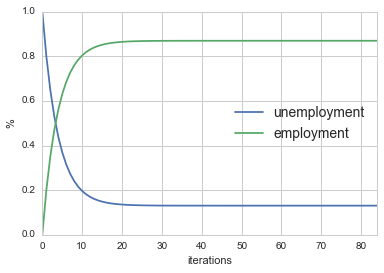

In [113]:
plt.plot(u_path, label="unemployment")
plt.plot(e_path, label="employment")
plt.xlim(0,timer)
plt.ylabel("%")
plt.xlabel("iterations")
plt.legend(loc='best', fontsize=14)
plt.show()

###Cool Exercise 2 part a

In [114]:
# Step 1: set paramenters
alpha_g = 0.01
lamb_g = 0.25
alpha_b = 0.02
lamb_b = 0.20
alpha_vb = 0.03
lamb_vb = 0.15
b = 0.01
d = 0.005
periods = 100

# Step 2: set vectors and matrices

# "Good A" or boom transition matrix
A_g = np.array([ [(1-d)*(1-alpha_g), (1-d)*lamb_g],
                [(1-d)*alpha_g + b, (1-lamb_g)*(1-d) + b ]])
Ahat_g = A_g/(1+b-d)

# "Bad A" or burst transition matrix
A_b = np.array([ [(1-d)*(1-alpha_b), (1-d)*lamb_b],
                [(1-d)*alpha_b + b, (1-lamb_b)*(1-d) + b ]])
Ahat_b = A_b/(1+b-d)

# "Very Bad A" or horrific transition matrix
A_vb = np.array([ [(1-d)*(1-alpha_vb), (1-d)*lamb_vb],
                [(1-d)*alpha_vb + b, (1-lamb_vb)*(1-d) + b ]])
Ahat_vb = A_vb/(1+b-d)

# Step 3: Set initial values
Ahat = Ahat_g
x_t = np.array([0.925753628346,0.0742463716543]) # Solution from before 
x_t1 = Ahat.dot(x_t) # First step

u_path = [x_t[1],x_t1[1]] # Generate a list for the path of unemployment, starting from the first values
e_path = [x_t[0],x_t1[0]] # Generate a list for the path of employment

# Step 4: Simulate
for t in np.arange(1,periods):         # We skip t=0 to allow for this to eb our steady-state
    x_t = x_t1
    if t%10==0 and t%20==0:         # If we are in a period divisible by 20, burst!
        Ahat = Ahat_b
        if t ==60:                  # If we are in period 60, mega-burst!
            Ahat = Ahat_vb
    elif t%10==0 and not t%20==0:   # If we are in a period divisible by 10, boom!
        Ahat = Ahat_g
    x_t1 = Ahat.dot(x_t)     
    u_path.append(x_t1[1])
    e_path.append(x_t1[0])


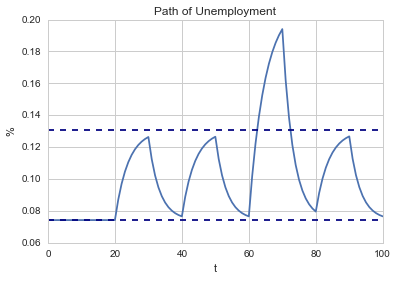

In [115]:
# Plotting cell
plt.plot(u_path, label="unemployment")
plt.xlim(0,periods)
plt.ylabel("%")
plt.axhline(0.130624727279, color='navy', ls='--')
plt.axhline(0.0742463716543, color='navy', ls='--')
plt.title("Path of Unemployment")
plt.xlabel("t")
plt.show()

###Cool Exercise 2 part b

In [116]:
# There are many ways to approach this exercise. One for example is to plan ahead what Ahat is going to be:
rhos = np.arange(0.05,1.05,0.20)
rhos = np.hstack((rhos,1.0))
u_paths = [[]]*len(rhos)
e_paths = [[]]*len(rhos)
l_paths = [[]]*len(rhos)
periods = 100

for i in range(len(rhos)):
    rho = rhos[i]
    l_t = lamb_g
    l_t1 = lamb_g
    l_t2 = lamb_g
    lss = lamb_g
    a_t = alpha_g
    A_t = np.array([ [(1-d)*(1-a_t), (1-d)*l_t],
                    [(1-d)*a_t + b, (1-l_t)*(1-d) + b ]])
    Ahat = A_t /(1+b-d)
    Ahat_path = [Ahat]
    l_paths[i]=[l_t]

    for t in np.arange(1,periods):
        l_t1 = l_t        
        if t%10==0 and t%20==0:         # If we are in a period divisible by 20, burst!
            a_t = alpha_b
            lss = lamb_b
            if t ==60:                  # If we are in period 60, mega-burst!
                a_t = alpha_vb
                lss = lamb_vb
        elif t%10==0 and not t%20==0:   # If we are in a period divisible by 10, boom!
            a_t = alpha_g
            lss = lamb_g
        l_t = (l_t1 + rho*(lss-l_t1))
        l_paths[i].append(l_t)
        A_t = np.array([ [(1-d)*(1-a_t), (1-d)*(l_t)],[(1-d)*a_t + b, (1-l_t)*(1-d) + b ]])
        Ahat = A_t /(1+b-d)
        Ahat_path.append(Ahat)
    
    x_t = np.array([0.925753628346,0.0742463716543]) # Solution from before 
    x_t1 = Ahat_path[0].dot(x_t) # First step

    u_paths[i] = [x_t[1],x_t1[1]] # Generate a list for the path of unemployment, starting from the first values
    e_paths[i] = [x_t[0],x_t1[0]] # Generate a list for the path of employment


    for t in np.arange(1,periods):         # We skip t=0 to allow for this to eb our steady-state
        x_t = x_t1
        x_t1 = Ahat_path[t].dot(x_t)     
        u_paths[i].append(x_t1[1])
        e_paths[i].append(x_t1[0])

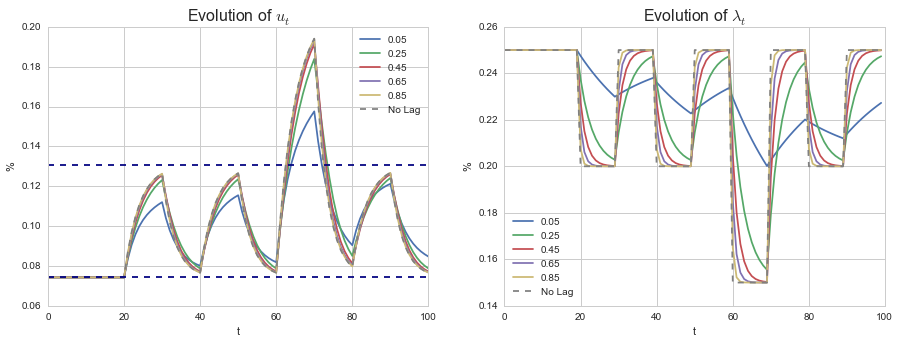

In [123]:
# Plotting cell
plt.figure(figsize=(15,5))
plt.subplot(121)
for i in range(len(u_paths)-1):
    plt.plot(u_paths[i], label=str(rhos[i]))
plt.plot(u_paths[-1], label="No Lag", ls='--', c='grey')
plt.xlim(0,periods)
plt.ylim(0.06,0.2)  # Keep the axis from before
plt.ylabel("%")
plt.xlabel("t")
plt.legend(loc='best')
plt.axhline(0.130624727279, color='navy', ls='--')
plt.axhline(0.0742463716543, color='navy', ls='--')
plt.title("Evolution of $u_t$", fontsize=16)

plt.subplot(122)
for i in range(len(l_paths)-1):
    plt.plot(l_paths[i], label=str(rhos[i]))
plt.plot(l_paths[-1], label="No Lag", ls='--', c='grey')
plt.xlim(0,periods)
#plt.ylim(0.06,0.2)  # Keep the axis from before
plt.ylabel("%")
plt.xlabel("t")
plt.legend(loc='best')
plt.title("Evolution of $\lambda_t$", fontsize=16)

plt.show()

## Part 3: McCall Search

### 3.1

In [106]:
def U(c, sigma=3.0):
    r'''
    Utility function of the agent        
    Parameters
    -------------        
    c - (array or float) consumption of the agent
    sigma - (float) risk aversion parameter  
    Returns
    ----------        
    U - (array or float) Utility of the agent for each level of consumption
    '''
    negative_c = c < 0.
    if sigma == 1.:
        U =  np.log(c)
    else:
        U= (c**(1-sigma) - 1)/(1-sigma)
    if type(U)==float:
        if U<0:
            U = -9999999
    else:
        U[negative_c] = -9999999.
    return U

U(9.0) # Executing this cell should work fine and now throw any errors!

0.49382716049382713

### 3.2 and 3.3

In [129]:
# Defining some parameters
alpha =0.012
gamma = 0.5
beta = 0.95
sigma = 3.0
wages = np.array([2.0,3.0,5.0])
p = np.array([0.3,0.5,0.2])

def iterateValueFunction(c,w,V): 
    r'''
    Iterates McCall search value function v
    
    Parameters
    ----------
    
    c - (float) Level of unemployment insurance

    w - (len(3) 1d-array) Vector of possible wages       
        
    V - (len(3) 1d-array) continuation value function if offered w[s] next period
        
    Returns
    --------

    V_new - (len(3) 1d-array) current value function if offered w[s] this period 

    Choice - (len(3) 1d-array) do we accept or reject wage w[s]
    '''
    S = len(p)
    Q = p.dot(V)# value before wage offer
    V_U = (U(c*np.ones(S)) + beta*gamma*Q)/( 1-beta*(1-gamma) )
    #stack value of accepting and rejecting offer on top of each other
    stacked_values = np.vstack([ V_U,
                                U(w) + (1-alpha)*beta*V + alpha*beta*V_U ]) 
                                    
    #find whether it is optimal to accept or reject offer    
    V_new = np.amax(stacked_values, axis = 0) 
    Choice = np.argmax(stacked_values, axis = 0)
    return V_new,Choice
        
def solveMcCallModel(c,w,eps = 1e-6):
    r'''
    Solves the infinite horizon McCall search model
        
    Parameters
    -----------
        
    c - (float) Level of unemployment insurance

    w - (len(3) 1d-array) Vector of possible wages 
        
    eps - (float) convergence criterion for infinite horizon
        
    Returns
    --------
        
    V - (1d-array) Value function that solves the infinite horizon problem
        
    Choice - (1d-array) Optimal policy of workers
    '''
    S = len(p)
    v = np.zeros(S) #intialize with zero
    diff = 1.0  #holds difference v_{t+1}-v_t
    v_path = []
    choice_path = []
    its = 0
    while diff > eps:
        v_new,choice = iterateValueFunction(c,w,v) 
        v_path.append(v_new)
        choice_path.append(choice)
        diff = float(np.amax( np.abs(v_new-v) ))#compute difference between value
        v = v_new #copy v_new into v #add in infinte horizon solution
        its +=1
            
    return v,choice,v_path,choice_path, its

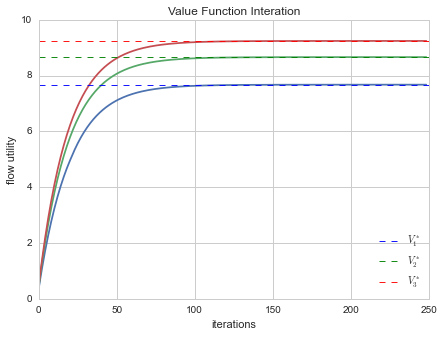

In [130]:
# This cell should work fine and plot something nice!
v_star, c_star, vs, cs, its= solveMcCallModel(1.0,problem_1.wstar)
labels = ["$V_1^*$","$V_2^*$","$V_3^*$"]
colors = ["b","g","r"]

plt.figure(figsize=(7,5))
plt.plot(vs)
for s in range(len(v_star)):
    plt.axhline(v_star[s], ls='--', lw=0.9,color=colors[s], label=labels[s])
plt.legend(loc='best')
plt.xlabel("iterations")
plt.ylabel("flow utility")
plt.title("Value Function Interation")
plt.show()

In [132]:
print "Iterations until convergence: ",its
print "Choice vector: ", c_star, "--> The agent rejects the lowest wage!"

Iterations until convergence:  249
Choice vector:  [0 1 1] --> The agent rejects the lowest wage!


### 3.4 and 3.5

In [77]:
import LakeModel as lm
# Defining wages distribution
w_1 = np.array([2.0,3.0,5.0])
pdf_1 = np.array([0.3,0.5,0.2])
# Creating an instance
model_1 = lm.LakeModel_Equilibrium(0.012,0.5,0.95,3.0, pdf_1, w_1)
# Solving for everything
Tax,Welfare,Flow_Unemp,Flow_Emp,eq_rates = model_1.find_steady_state_tax(1.0)
print "Unemployment rate: ",eq_rates[1]
print "Optimal tax: ",Tax
print "Total welfare: ",Welfare

 Unemployment rate:  0.0331507714076
Optimal tax:  0.033150771408
Total welfare:  [ 8.76247399]


In [80]:
# Defining wages distribution
w_2=np.array([1.0,2.0,3.0,10.0])
pdf_2=np.array([0.1,0.45,0.4,0.05])
w_1 = np.array([2.0,3.0,5.0])

# Creating an instance
model_2 = lm.LakeModel_Equilibrium(0.012,0.5,0.95,3.0, pdf_2, w_2)
# Solving for everything
Tax,Welfare,Flow_Unemp,Flow_Emp,eq_rates = model_2.find_steady_state_tax(1.0)
print "Unemployment rate: ",eq_rates[1]
print "Optimal tax: ",Tax
print "Total welfare: ",Welfare

 Unemployment rate:  0.025975078493
Optimal tax:  0.025975078493
Total welfare:  [ 7.99147536]


## Part 4: Offer Distribution Unknown

### 4.1

In [14]:
# Improting libraries and functions
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from scipy.interpolate import LinearNDInterpolator
from quantecon import compute_fixed_point
from quantecon.models import SearchProblem

# Get your team!
teams = ['Team VFI','Team RWO']
print 'Welcome to',teams[np.random.randint(0,2)],'!'

Welcome to Team VFI !


Computed iterate 1 with error 28.000000
Computed iterate 2 with error 16.056441
Computed iterate 3 with error 3.555674
Computed iterate 4 with error 2.168246
Computed iterate 5 with error 1.322194
Computed iterate 6 with error 0.806273
Computed iterate 7 with error 0.491664
Computed iterate 8 with error 0.329066
Computed iterate 9 with error 0.240566
Computed iterate 10 with error 0.171703
Computed iterate 11 with error 0.121282
Computed iterate 12 with error 0.088754
Computed iterate 13 with error 0.063538
Computed iterate 14 with error 0.045057
Computed iterate 15 with error 0.031701
Computed iterate 16 with error 0.022273
Computed iterate 17 with error 0.015824
Computed iterate 18 with error 0.011221
Computed iterate 19 with error 0.007948
Computed iterate 20 with error 0.005626
Computed iterate 21 with error 0.003993
Computed iterate 22 with error 0.002844
Computed iterate 23 with error 0.002025
Computed iterate 24 with error 0.001447
Computed iterate 25 with error 0.001035
Compute

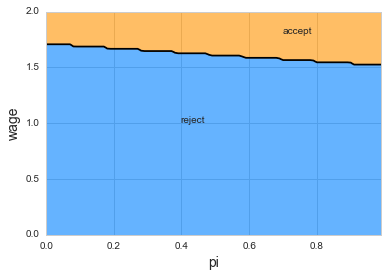

In [3]:
############################### Team VFI #######################################

sp = SearchProblem(w_grid_size=100, pi_grid_size=100)
v_init = np.zeros(len(sp.grid_points)) + sp.c / (1 - sp.beta)
v = compute_fixed_point(sp.bellman_operator, v_init)
policy = sp.get_greedy(v)

# Make functions from these arrays by interpolation
vf = LinearNDInterpolator(sp.grid_points, v)
pf = LinearNDInterpolator(sp.grid_points, policy)

pi_plot_grid_size, w_plot_grid_size = 100, 100
pi_plot_grid = np.linspace(0.001, 0.99, pi_plot_grid_size)
w_plot_grid = np.linspace(0, sp.w_max, w_plot_grid_size)
Z = np.empty((w_plot_grid_size, pi_plot_grid_size))
for i in range(w_plot_grid_size):
    for j in range(pi_plot_grid_size):
        Z[i, j] = pf(w_plot_grid[i], pi_plot_grid[j])

# Plotting bit
fig, ax = plt.subplots(figsize=(9, 7))
ax.contourf(pi_plot_grid, w_plot_grid, Z, 1, alpha=0.6, cmap=cm.jet)
ax.contour(pi_plot_grid, w_plot_grid, Z, 1, colors="black")
plt.xlabel('Probability of being in Bad times',fontsize=14)
plt.ylabel('Wage',fontsize=14)
ax.text(0.4, 1.0, 'reject',fontsize=14)
ax.text(0.7, 1.8, 'accept',fontsize=14)

plt.show()

Computed iterate 1 with error 0.426161
Computed iterate 2 with error 0.127050
Computed iterate 3 with error 0.076090
Computed iterate 4 with error 0.046400
Computed iterate 5 with error 0.028295
Computed iterate 6 with error 0.018182
Computed iterate 7 with error 0.013566
Computed iterate 8 with error 0.009611
Computed iterate 9 with error 0.007113
Computed iterate 10 with error 0.005174
Computed iterate 11 with error 0.003732
Computed iterate 12 with error 0.002657
Computed iterate 13 with error 0.001876
Computed iterate 14 with error 0.001348
Computed iterate 15 with error 0.000965


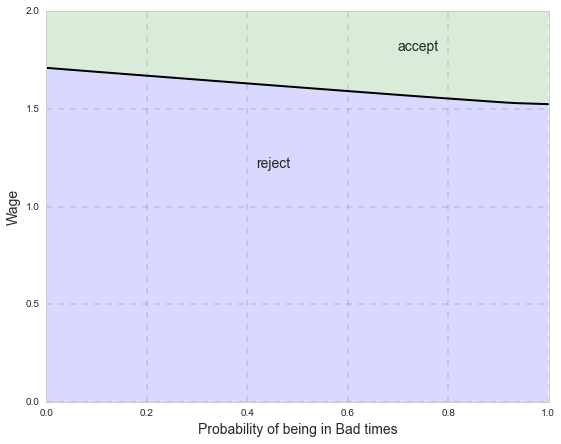

In [60]:
############################### Team RWO #######################################

sp = SearchProblem(pi_grid_size=50)
phi_init = np.ones(len(sp.pi_grid)) 
w_bar = compute_fixed_point(sp.res_wage_operator, phi_init)

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(sp.pi_grid, w_bar, linewidth=2, color='black')
ax.set_ylim(0, 2)
ax.grid(axis='x', linewidth=0.25, linestyle='--', color='0.25')
ax.grid(axis='y', linewidth=0.25, linestyle='--', color='0.25')
ax.fill_between(sp.pi_grid, 0, w_bar, color='blue', alpha=0.15)
ax.fill_between(sp.pi_grid, w_bar, 2, color='green', alpha=0.15)
ax.text(0.42, 1.2, 'reject',fontsize=14)
ax.text(0.7, 1.8, 'accept',fontsize=14)
plt.xlabel('Probability of being in Bad times',fontsize=14)
plt.ylabel('Wage',fontsize=14)
plt.show()

### 4.2

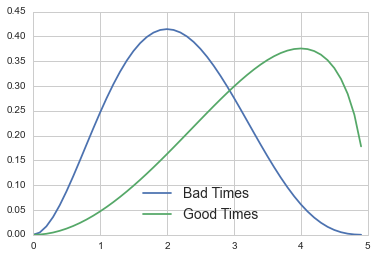

In [58]:
from scipy.stats import beta as beta_distribution
Bad_times = beta_distribution(3, 4, scale=5.0)
Good_Times = beta_distribution(3, 1.5, scale=5.0)
plt.plot(np.arange(0,5.0,0.1),Bad_times.pdf(np.arange(0,5.0,0.1)), label='Bad Times')
plt.plot(np.arange(0,5.0,0.1),Good_Times.pdf(np.arange(0,5.0,0.1)), label='Good Times')
plt.legend(loc='best',fontsize=14)
plt.show()

Computed iterate 1 with error 2.238144
Computed iterate 2 with error 0.380371
Computed iterate 3 with error 0.173699
Computed iterate 4 with error 0.090133
Computed iterate 5 with error 0.058239
Computed iterate 6 with error 0.040368
Computed iterate 7 with error 0.034121
Computed iterate 8 with error 0.028993
Computed iterate 9 with error 0.024636
Computed iterate 10 with error 0.020933
Computed iterate 11 with error 0.017787
Computed iterate 12 with error 0.015114
Computed iterate 13 with error 0.012843
Computed iterate 14 with error 0.010912
Computed iterate 15 with error 0.009272
Computed iterate 16 with error 0.007879
Computed iterate 17 with error 0.006695
Computed iterate 18 with error 0.005689
Computed iterate 19 with error 0.004834
Computed iterate 20 with error 0.004107
Computed iterate 21 with error 0.003490
Computed iterate 22 with error 0.002965
Computed iterate 23 with error 0.002520
Computed iterate 24 with error 0.002141
Computed iterate 25 with error 0.001819
Computed 

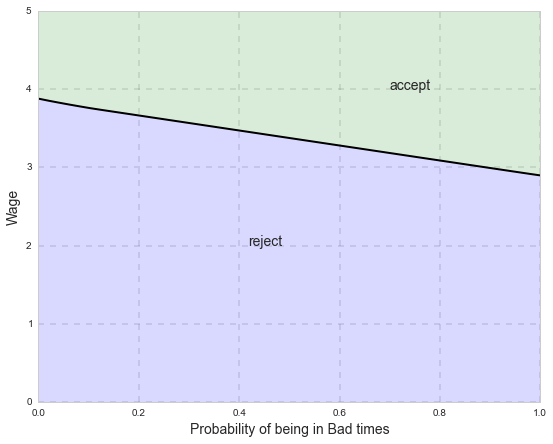

In [62]:
sp = SearchProblem(beta=0.95, c=1.0, F_a=3, F_b=4,G_a=3, G_b=1.5,
                 w_max=5.0, pi_grid_size=50)
phi_init = np.ones(len(sp.pi_grid)) 
w_bar = compute_fixed_point(sp.res_wage_operator, phi_init)
#Plotting bit
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(sp.pi_grid, w_bar, linewidth=2, color='black')
ax.set_ylim(0, 5)
ax.grid(axis='x', linewidth=0.25, linestyle='--', color='0.25')
ax.grid(axis='y', linewidth=0.25, linestyle='--', color='0.25')
ax.fill_between(sp.pi_grid, 0, w_bar, color='blue', alpha=0.15)
ax.fill_between(sp.pi_grid, w_bar, 5, color='green', alpha=0.15)
ax.text(0.42, 2.0, 'reject',fontsize=14)
plt.xlabel('Probability of being in Bad times',fontsize=14)
plt.ylabel('Wage',fontsize=14)
ax.text(0.7, 4.0, 'accept',fontsize=14)
plt.show()

In [70]:
for i in range(len(w_bar)):
    if w_bar[i]<=3.0:
        index_3 = i
        break
print "Need at least a", sp.pi_grid[i]*100,"% chance of being in Bad Times to accept a wage of 3.0"

Need at least a 89.7163265306 % chance of being in Bad Times to accept a wage of 3.0


### Final Exercise

Computed iterate 1 with error 0.426161
Computed iterate 2 with error 0.127050
Computed iterate 3 with error 0.076090
Computed iterate 4 with error 0.046400
Computed iterate 5 with error 0.028295
Computed iterate 6 with error 0.018182
Computed iterate 7 with error 0.013566
Computed iterate 8 with error 0.009611
Computed iterate 9 with error 0.007113
Computed iterate 10 with error 0.005174
Computed iterate 11 with error 0.003732
Computed iterate 12 with error 0.002657
Computed iterate 13 with error 0.001876
Computed iterate 14 with error 0.001348
Computed iterate 15 with error 0.000965
('date =', 0)
('date =', 20)
('date =', 40)
('date =', 60)
('date =', 80)
('date =', 100)
('date =', 120)
('date =', 140)
('date =', 160)
('date =', 180)
('date =', 200)
('date =', 220)
('date =', 240)
('date =', 260)
('date =', 280)
('date =', 300)
('date =', 320)
('date =', 340)
('date =', 360)
('date =', 380)
('date =', 400)
('date =', 420)
('date =', 440)
('date =', 460)
('date =', 480)
('date =', 500)

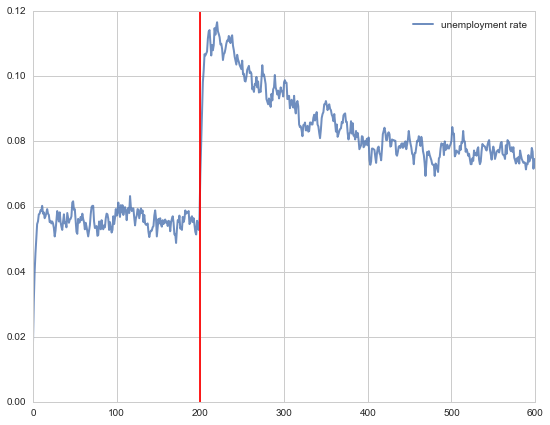

In [71]:
from scipy import interp
# Set up model and compute the function w_bar
sp = SearchProblem(pi_grid_size=50, F_a=1, F_b=1)
pi_grid, f, g, F, G = sp.pi_grid, sp.f, sp.g, sp.F, sp.G
phi_init = np.ones(len(sp.pi_grid)) 
w_bar_vals = compute_fixed_point(sp.res_wage_operator, phi_init)
w_bar = lambda x: interp(x, pi_grid, w_bar_vals)


class Agent(object):
    """
    Holds the employment state and beliefs of an individual agent.
    """

    def __init__(self, pi=1e-3):
        self.pi = pi
        self.employed = 1

    def update(self, H):
        "Update self by drawing wage offer from distribution H."
        if self.employed == 0:
            w = H.rvs()
            if w >= w_bar(self.pi):
                self.employed = 1
            else:
                self.pi = 1.0 / (1 + ((1 - self.pi) * g(w)) / (self.pi * f(w)))


num_agents = 5000
separation_rate = 0.025  # Fraction of jobs that end in each period 
separation_num = int(num_agents * separation_rate)
agent_indices = list(range(num_agents))
agents = [Agent() for i in range(num_agents)]
sim_length = 600
H = G  # Start with distribution G
change_date = 200  # Change to F after this many periods

unempl_rate = []
for i in range(sim_length):
    if i % 20 == 0:
        print("date =", i)
    if i == change_date:
        H = F
    # Randomly select separation_num agents and set employment status to 0
    np.random.shuffle(agent_indices)
    separation_list = agent_indices[:separation_num]
    for agent_index in separation_list:
        agents[agent_index].employed = 0
    # Update agents
    for agent in agents:
        agent.update(H)
    employed = [agent.employed for agent in agents]
    unempl_rate.append(1 - np.mean(employed))

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(unempl_rate, lw=2, alpha=0.8, label='unemployment rate')
ax.axvline(change_date, color="red")
ax.legend()
plt.show()